# Layer 3

- Preprocesamiento de PDFs en Proyecto de OCR

## Objetivo

- Optimizar la calidad y consistencia de un conjunto de documentos PDF, con el objetivo de preparar los datos para el entrenamiento de un modelo de Reconocimiento Óptico de Caracteres (OCR).

---

## Metodologia


## 1- Separación de Datos Según Calidad

- **Propósito**: Separar los archivos a formatos de alta y baja calidad para entrenar el modelo.
- **Metodología**: Se realiza la separación utilizando un script en Python que lee un archivo CSV que contiene metadatos de los archivos, incluido el productor. Luego, basándose en esta información, mueve los archivos a las carpetas correspondientes.

## 2- Análisis de Calidad de Archivos PDF

- **Propósito**: Analizar la calidad de los archivos PDF basándose en la fuente de creación del dato.
- **Metodología**: Analizaremos la proporción y distribución de estos archivos y sus datos asociados, para determinar cuales son los ideales para entrenar el modelo.

## 3- Segmentación de Archivos PDF

- **Propósito**: Dividir los archivos PDF en secciones o segmentos más pequeños para un manejo más eficiente durante el entrenamiento.
- **Metodología**: Utilizando herramientas específicas para PDF, se segmentarán los documentos para utilizar los más pequeños, maximizando la cantidad de información para entrenamiento.

## 4- Subdivisión en carpetas de 1GB

- **Propósito**: Organizar los archivos en carpetas de manera que cada carpeta no exceda un tamaño de 1GB para una gestión más sencilla.
- **Metodología**: Se usará un script en Python que distribuirá los archivos en carpetas basado en su tamaño acumulado hasta que se alcance el límite de 1GB.

## 5- Análisis de las 10 carpetas de High Quality Data

- **Propósito**: Evaluar y asegurar la calidad de los datos dentro de las 10 carpetas etiquetadas como de alta calidad.
- **Metodología**: Se llevará a cabo un análisis detallado de los archivos dentro de estas carpetas, verificando su integridad, relevancia y consistencia con los criterios de alta calidad.

## 6- Maximización de archivos

- **Propósito**: Se realizará una recolección de archivos para lograr conformar un último grupo de archivos de alta calidad para el entrenamiento del modelo.
- **Metodología**: Se identificarán y agregarán nuevos archivos de alta calidad a la colección, asegurando que cumplan con los estándares requeridos y que mejoren la capacidad y precisión del modelo en entrenamiento.

## Conclusion final

---



## 1 - Separación de Datos Según Calidad

Para mejorar el proceso de entrenamiento del modelo, es útil separar los datos en dos grupos según su calidad. En particular, se ha observado que los archivos producidos por la máquina `Samsung-M4580FX` son de alta calidad. Por tanto, se decide dividir los archivos en dos grupos: 

1. **high_qtly_data**: Contiene los archivos con alta calidad, específicamente los producidos por `Samsung-M4580FX`.
2. **low_qtly_data**: Contiene el resto de los archivos.

### Proceso de Separación

Se realiza la separación utilizando un script en Python que lee un archivo CSV que contiene metadatos de los archivos, incluido el productor. Luego, basándose en esta información, mueve los archivos a las carpetas correspondientes.


In [ ]:
# Se crea un csv con la data de los archivos pdf en training data.

import PyPDF2
import os
import csv

def extract_metadata(pdf_path):
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        metadata = reader.metadata
        total_pages = len(reader.pages)
    return {**metadata, 'TotalPages': total_pages} if metadata else {'TotalPages': total_pages}


def process_directory(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Name', 'Producer', 'Creator', 'TotalPages', 'FileSize']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for root, dirs, files in os.walk(directory_path):
            for file in files:
                if file.endswith(".pdf"):
                    pdf_path = os.path.join(root, file)
                    try:
                        metadata = extract_metadata(pdf_path)
                        file_size = os.path.getsize(pdf_path)
                        writer.writerow({
                            'Name': file,
                            'Producer': metadata.get('/Producer', ''),
                            'Creator': metadata.get('/Creator', ''),
                            'TotalPages': metadata.get('TotalPages', ''),
                            'FileSize': file_size,
                        })
                    except Exception as e:
                        print(f"Error processing {pdf_path}: {e}")

directory = r"C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\ETF Layer2 - Pdf_datset\Training Dataset"
output_file = 'training_data.csv'
process_directory(directory, output_file)

Se separan en high_qtly_data los archivos producidos por `Samsung-M4580FX` y en low_qtly_data el resto de los archivos.

In [ ]:
import pandas as pd
import os
import shutil

# Ruta al archivo CSV
csv_route = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\ETF Layer2 - Pdf_datset\metadata_3.0.csv'

# Carpeta donde se encuentran actualmente los archivos y donde se crearán las nuevas carpetas 'high_qtly_data' y 'low_qtly_data'
source_folder = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\ETF Layer2 - Pdf_datset\Training Dataset'

# Definir rutas para las carpetas de alta y baja calidad
high_quality_folder = os.path.join(source_folder, 'high_qtly_data')
low_quality_folder = os.path.join(source_folder, 'low_qtly_data')

# Crear las carpetas si no existen
if not os.path.exists(high_quality_folder):
    os.makedirs(high_quality_folder)
    
if not os.path.exists(low_quality_folder):
    os.makedirs(low_quality_folder)

# Leer el archivo CSV
data = pd.read_csv(csv_route)

# Separar los archivos según el productor
for index, row in data.iterrows():
    file_name = row['Name']
    producer = row['Producer']

    source_file_path = os.path.join(source_folder, file_name)
    
    # Si el productor es 'Samsung-M4580FX', mover a 'high_qtly_data'; de lo contrario, mover a 'low_qtly_data'
    if producer == 'Samsung-M4580FX':
        dest_file_path = os.path.join(high_quality_folder, file_name)
    else:
        dest_file_path = os.path.join(low_quality_folder, file_name)
    
    # Comprobar si el archivo existe en la ubicación original antes de moverlo
    if os.path.exists(source_file_path):
        shutil.move(source_file_path, dest_file_path)

Creacion de un csv con los datos de los archivos de alta calidad, que serán estudiados. 

In [ ]:
# Se crea un csv con la metadata de los archivos pdf

import PyPDF2
import os
import csv

def extract_metadata(pdf_path):
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        metadata = reader.metadata
        total_pages = len(reader.pages)
    return {**metadata, 'TotalPages': total_pages} if metadata else {'TotalPages': total_pages}


def process_directory(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Name', 'Producer', 'TotalPages', 'FileSize']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for root, dirs, files in os.walk(directory_path):
            for file in files:
                if file.endswith(".pdf"):
                    pdf_path = os.path.join(root, file)
                    try:
                        metadata = extract_metadata(pdf_path)
                        file_size = os.path.getsize(pdf_path)
                        writer.writerow({
                            'Name': file,
                            'Producer': metadata.get('/Producer', ''),
                            'TotalPages': metadata.get('TotalPages', ''),
                            'FileSize': file_size,
                        })
                    except Exception as e:
                        print(f"Error processing {pdf_path}: {e}")

directory = r"C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\ETF Layer2 - Pdf_datset\Training Dataset\high_qtly_data"
output_file = 'training_hq_data_1.0.csv'
process_directory(directory, output_file)

Analisis de los datos de alta calidad:

- **Total de archivos**: 6416.


## 2 -Análisis de Calidad de Archivos basado en la fuente de creación del Dato

Dentro del conjunto de datos con el que trabajamos, identificamos que la calidad superior de archivos es producida por la máquina `Samsung-M4580FX`. Dado este hallazgo, se ha tomado la decisión de segmentar nuestro conjunto de datos en dos categorías principales:

        - Archivos generados por `Samsung-M4580FX`
        - Archivos generados por otras máquinas

### Objetivo

El propósito de esta segmentación es analizar la proporción de archivos en cada categoría. Una vez realizado este análisis, evaluaremos si es necesario aplicar técnicas de balanceo para garantizar que nuestros modelos de Machine Learning no estén sesgados hacia una categoría específica.

### Procedimiento

        1. Generaremos un CSV que contenga la totalidad de archivos, donde se especificará qué archivos fueron generados por la máquina `Samsung-M4580FX` y cuáles por otras máquinas.
        2. Analizaremos la proporción y distribución de estos archivos.
        3. Tomaremos decisiones basadas en estos análisis para determinar los pasos a seguir en el preprocesamiento de datos.

### Resultados esperados

Al final de este proceso, esperamos tener una clara comprensión de la distribución de nuestros datos y haber tomado decisiones informadas sobre cualquier necesidad de balanceo.

**Nota**: Este análisis es crítico para asegurar que nuestros modelos de Machine Learning sean robustos y generalicen bien a datos no vistos previamente.

El estudio del CSV incluirá:

- Carga del CSV.
- Análisis descriptivo básico.
- Visualización de los datos.
- Identificación de posibles anomalías o puntos de interés.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga del CSV
csv_path = r"C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\ETF Layer2 - Pdf_datset\metadata_3.0.csv"  #  ruta CSV``
data = pd.read_csv(csv_path)

# Convertir el tamaño de los archivos de bytes a KB
data['FileSize'] = data['FileSize'] / 1024

# 2. Análisis descriptivo básico
print("Descripción básica de los datos:")
print(data.describe(include='all'))

print("\nInformación sobre datos faltantes:")
print(data.isnull().sum())

# 3. Visualización de los datos
# Histograma para el tamaño de los archivos
plt.figure(figsize=(10, 6))
sns.histplot(data['FileSize'], bins=50, color='blue', kde=True)
plt.title('Distribución del Tamaño de Archivos')
plt.xlabel('Tamaño de Archivo')
plt.ylabel('Cantidad de Archivos')
plt.show()

# Conteo de archivos por productor
plt.figure(figsize=(10, 6))
data['Producer'].value_counts().plot(kind='barh', color='green')
plt.title('Cantidad de Archivos por Productor')
plt.xlabel('Cantidad de Archivos')
plt.ylabel('Productor')
plt.gca().invert_yaxis()
plt.show()

# Conteo de archivos por creador
plt.figure(figsize=(10, 6))
data['Creator'].value_counts().plot(kind='barh', color='orange')
plt.title('Cantidad de Archivos por Creador')
plt.xlabel('Cantidad de Archivos')
plt.ylabel('Creador')
plt.gca().invert_yaxis()
plt.show()

# Histograma para el número total de páginas
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPages'], bins=50, color='red', kde=True)
plt.title('Distribución del Total de Páginas por Archivo')
plt.xlabel('Total de Páginas')
plt.ylabel('Cantidad de Archivos')
plt.show()

# 4. Identificación de posibles anomalías o puntos de interés
# Por ejemplo, identificar archivos que tienen un tamaño extremadamente grande
large_files = data[data['FileSize'] > data['FileSize'].quantile(0.95)]
print("\nArchivos que tienen un tamaño superior al 95% de los demás:")
print(large_files)


In [ ]:
# Importando las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la columna 'FileSize'
plt.figure(figsize=(10, 6))
sns.histplot(data['FileSize'], bins=50, kde=True)
plt.title('Distribución del Tamaño de Archivo (KB)')
plt.xlabel('Tamaño de Archivo (KB)')
plt.ylabel('Cantidad de Archivos')
plt.show()

# Histograma para la columna 'TotalPages'
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPages'], bins=30, kde=True)
plt.title('Distribución del Número Total de Páginas')
plt.xlabel('Total de Páginas')
plt.ylabel('Cantidad de Archivos')
plt.show()

# Diagrama de caja para la columna 'FileSize'
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['FileSize'])
plt.title('Diagrama de Caja para el Tamaño de Archivo (KB)')
plt.ylabel('Tamaño de Archivo (KB)')
plt.show()

# Diagrama de caja para la columna 'TotalPages'
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['TotalPages'])
plt.title('Diagrama de Caja para el Número Total de Páginas')
plt.ylabel('Total de Páginas')
plt.show()

        TotalPages     FileSize
count  6416.000000  6416.000000
mean      3.650249     1.791254
std       2.078174     1.239655
min       1.000000     0.409972
25%       3.000000     1.063280
50%       3.000000     1.386945
75%       4.000000     2.071894
max      27.000000    22.007888

Datos faltantes por columna:
Name          0
Producer      0
TotalPages    0
FileSize      0
dtype: int64


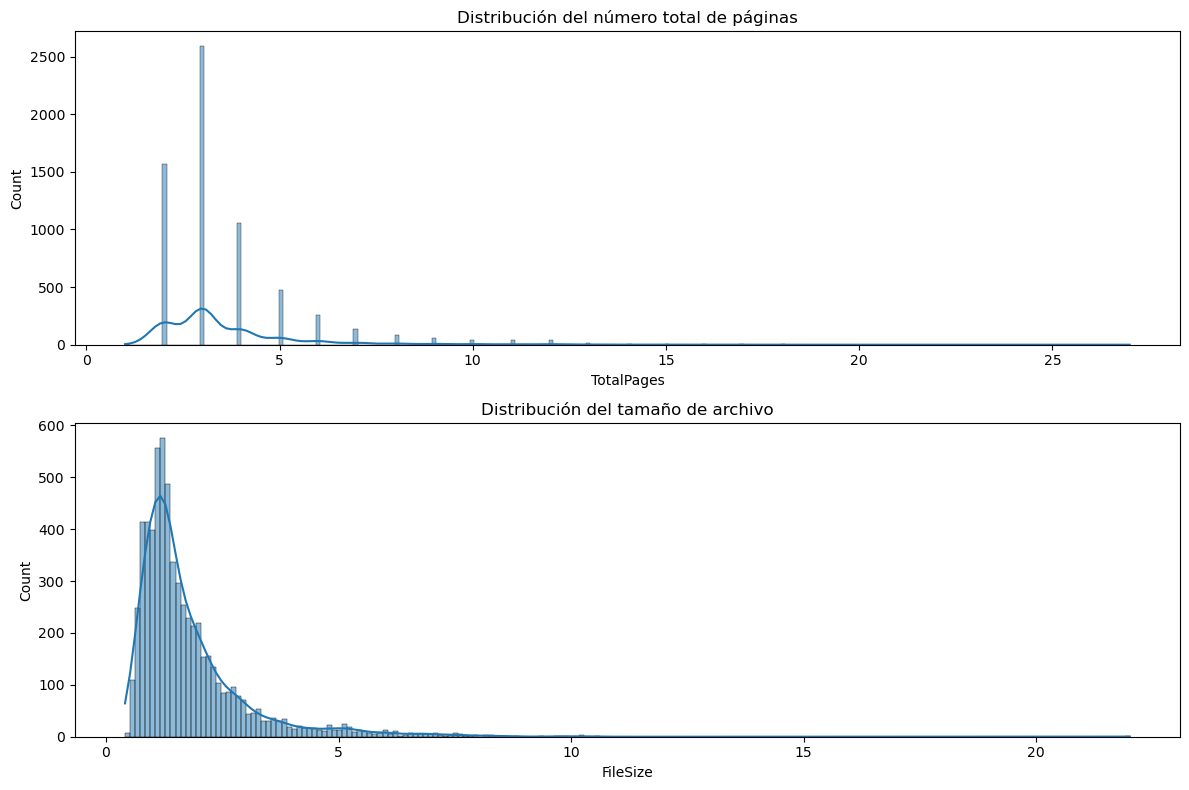

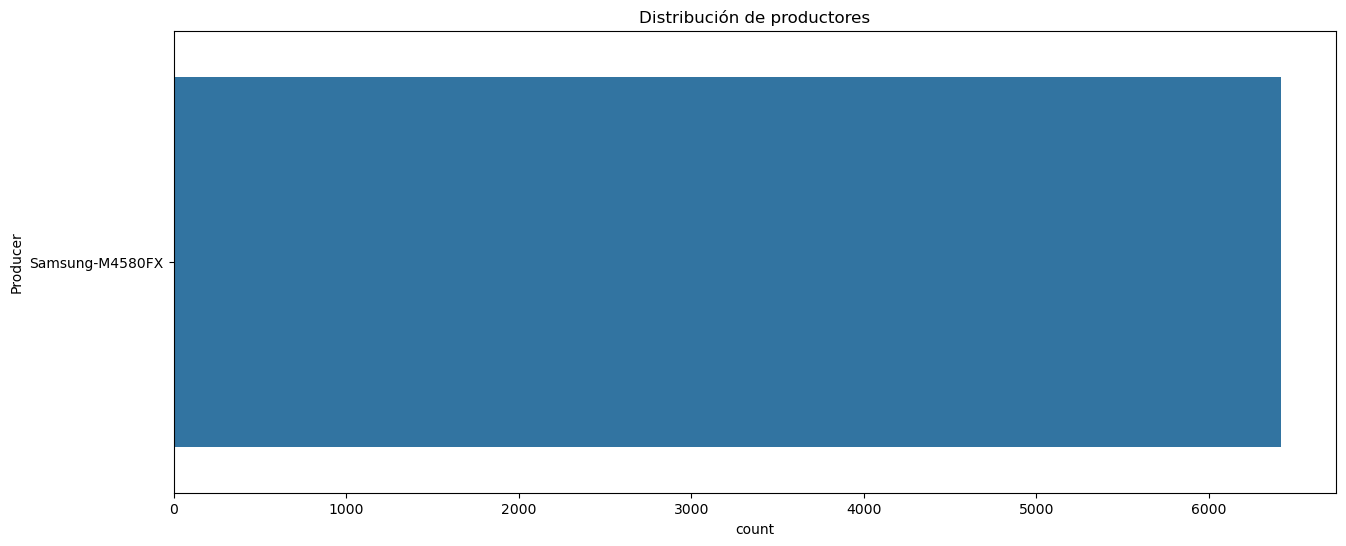

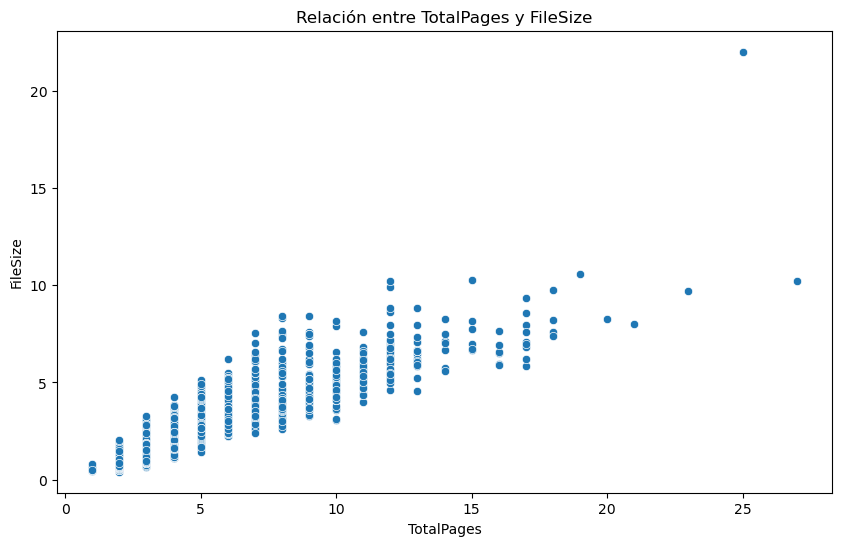

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el CSV
df = pd.read_csv(r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\training_hq_data_1.0.csv')

# Convertir tamaños de B a MB
df['FileSize'] = df['FileSize'] / 1024 / 1024

# Resumen descriptivo
print(df.describe())

# Información sobre datos faltantes
print("\nDatos faltantes por columna:")
print(df.isnull().sum())

# Visualización de la distribución de TotalPages y FileSize
fig, axs = plt.subplots(nrows=2, figsize=(12, 8))

sns.histplot(df['TotalPages'], kde=True, ax=axs[0])
axs[0].set_title('Distribución del número total de páginas')

sns.histplot(df['FileSize'], kde=True, ax=axs[1])
axs[1].set_title('Distribución del tamaño de archivo')

plt.tight_layout()
plt.show()

# Distribución de los productores
plt.figure(figsize=(15, 6))
sns.countplot(y='Producer', data=df, order=df['Producer'].value_counts().index)
plt.title('Distribución de productores')
plt.show()

# Relación entre TotalPages y FileSize
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPages', y='FileSize', data=df)
plt.title('Relación entre TotalPages y FileSize')
plt.show()

## 3 - Segmentacion de archivos

**Tamaño de los archivos**
         
- La distribución del tamaño de archivo es variada, con una media de 1.79 MB y un rango que va desde 0.41 MB hasta 22 MB.

- Se decide segmentar los datos en dos grupos: archivos menores a 5MB y archivos mayores a 5MB. 

- Los mayores seran retirados del dataset ya que no representan una mejoria significativa en cuanto a calidad de imagen para el modelo.

In [ ]:
import os
import shutil

def move_large_files(source_dir, target_dir, threshold_size=5):
    """
    Mueve todos los archivos en `source_dir` que sean mayores que `threshold_size` (en MB) a `target_dir`.
    
    :param source_dir: Ruta del directorio origen.
    :param target_dir: Ruta del directorio destino.
    :param threshold_size: Tamaño umbral en MB.
    """
    
    # Asegurarse de que el directorio destino existe
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Listar todos los archivos en el directorio origen
    for filename in os.listdir(source_dir):
        file_path = os.path.join(source_dir, filename)
        
        # Verificar si es un archivo (y no un subdirectorio)
        if os.path.isfile(file_path):
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convertir el tamaño a MB
            
            # Si el archivo supera el umbral, moverlo al directorio destino
            if file_size > threshold_size:
                shutil.move(file_path, os.path.join(target_dir, filename))
                print(f"Archivo {filename} movido a {target_dir}")

# Ejemplo de uso:
source_directory = r"C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer2 - Pdf_dataset\Training Dataset\high_qtly_data"
destination_directory = r"C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer2 - Pdf_dataset\backup"
move_large_files(source_directory, destination_directory)

## 4 - Subdivision en carpetas 

Se realiza una subdivicion de los archivos en carpetas de hasta 1GB de espacio en disco cada una.

In [2]:
import os
import shutil
from tqdm import tqdm

CARPETA_ORIGEN = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\Training Dataset\high_qtly_data'  # Ejemplo: '/home/usuario/mis_archivos'
CARPETA_DESTINO = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\Training Dataset\high_qtly_data'  # Ejemplo: '/home/usuario/mis_archivos_organizados'
LIMITE = 1 * 1024 * 1024 * 1024  # 1 GB


def obtener_tamaño_archivo(path):
    return os.path.getsize(path)


def mover_archivos():
    if not os.path.exists(CARPETA_DESTINO):
        os.makedirs(CARPETA_DESTINO)

    archivos = [f for f in os.listdir(CARPETA_ORIGEN) if os.path.isfile(os.path.join(CARPETA_ORIGEN, f))]
    archivos.sort(key=lambda x: obtener_tamaño_archivo(os.path.join(CARPETA_ORIGEN, x)), reverse=True)

    carpeta_actual_num = 1
    carpeta_actual_tamaño = 0
    carpeta_actual = os.path.join(CARPETA_DESTINO, f'carpeta_{carpeta_actual_num}')

    for archivo in tqdm(archivos, desc="Moviendo archivos", unit="archivo"):
        archivo_path = os.path.join(CARPETA_ORIGEN, archivo)
        tamaño_archivo = obtener_tamaño_archivo(archivo_path)

        # Si agregar este archivo supera el límite, crea una nueva carpeta
        if carpeta_actual_tamaño + tamaño_archivo > LIMITE:
            carpeta_actual_num += 1
            carpeta_actual_tamaño = 0
            carpeta_actual = os.path.join(CARPETA_DESTINO, f'carpeta_{carpeta_actual_num}')

        # Crea la carpeta si aún no existe
        if not os.path.exists(carpeta_actual):
            os.makedirs(carpeta_actual)

        # Mover el archivo
        shutil.move(archivo_path, os.path.join(carpeta_actual, archivo))

        carpeta_actual_tamaño += tamaño_archivo


if __name__ == "__main__":
    mover_archivos()


Moviendo archivos: 100%|██████████| 6192/6192 [00:11<00:00, 540.00archivo/s]


## Analisis

El conjunto de datos analizado contiene información sobre archivos que varían en tamaño, resolución y cantidad de páginas. Al observar los datos, se toma la determinacion de separar los archivos mayores a 5MB ya que en cuanto a calidad de imagen no representan una mejoria significativa para el modelo.

- **Cantidad de Archivos**

        Tenemos un total de 6,416 archivos en el dataset.

- **Tamaño de las Páginas**

        La mayoría de los archivos tienen al menos 3 páginas, con una media de 3.65 páginas por archivo. Sin embargo, algunos archivos contienen hasta 27 páginas.
    
        La distribución del tamaño de archivo es variada, con una media de 1.79 MB y un rango que va desde 0.41 MB hasta 22 MB.

- **Subdivision en carpetas de 1GB**        
        
        Se dividio el dataset de alta calidad en 10 carpetas de hasta 1GB de espacio ocupado en disco. Se realizara un posterior analisis de los atributos generales de cada carpeta para determinar si es necesario realizar un balanceo de datos.

## 5- Analisis de las 10 carpetas de High Quality Data

In [4]:
import os
import csv

CARPETA_RAIZ = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\Training Dataset\high_qtly_data'
NOMBRE_CSV = "HQ_data_folder_info.csv"

def obtener_tamaño_carpeta(path):
    """Devuelve el tamaño total de la carpeta especificada, incluyendo su contenido."""
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total += os.path.getsize(fp)
    return total

def obtener_cantidad_archivos(path):
    """Devuelve la cantidad de archivos en la carpeta especificada."""
    return sum([len(files) for _, _, files in os.walk(path)])

def generar_csv():
    with open(NOMBRE_CSV, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Carpeta", "Tamaño (bytes)", "Cantidad de archivos"])

        # Recorre la carpeta raíz y sus subcarpetas
        for dirpath, _, _ in os.walk(CARPETA_RAIZ):
            nombre_carpeta = os.path.basename(dirpath)
            tamaño_carpeta = obtener_tamaño_carpeta(dirpath)
            cantidad_archivos = obtener_cantidad_archivos(dirpath)
            writer.writerow([nombre_carpeta, tamaño_carpeta, cantidad_archivos])

if __name__ == "__main__":
    generar_csv()
    print(f"Información escrita en {NOMBRE_CSV}")

Información escrita en HQ_data_folder_info.csv


Lectura de datos

In [6]:
import csv

def leer_csv(ruta_archivo):
    with open(ruta_archivo, 'r', newline='') as archivo:
        lector = csv.reader(archivo)
        
        for fila in lector:
            print(fila)

if __name__ == "__main__":
    ruta_archivo = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\HQ_data_folder_info.csv'
    leer_csv(ruta_archivo)


['Carpeta', 'Tamaño (bytes)', 'Cantidad de archivos']
['high_qtly_data', '10550254315', '6192']
['carpeta_1', '1073602094', '243']
['carpeta_10', '893343063', '1098']
['carpeta_2', '1072462001', '320']
['carpeta_3', '1072846783', '388']
['carpeta_4', '1072913121', '461']
['carpeta_5', '1073701889', '534']
['carpeta_6', '1072798012', '621']
['carpeta_7', '1072791222', '726']
['carpeta_8', '1072579943', '829']
['carpeta_9', '1073216187', '972']


Analisis: A partir de los datos obtenidos, se puede observar que la distribucion de los datos es bastante homogenea,si bien no es necesario realizar un balanceo de datos, se decide realizar una ultima modificacion a la hora de elegir los mejores archivos para el entrenamiento del modelo.

## 6- Maximizacion de archivos.

Se decide seleccionar la mayor cantidad posible de archivos que ocupen un espacio en disco menor a 1GB

In [7]:
import os
import shutil

CARPETA_ORIGEN = r'C:\Users\HP\My Drive\Inteligencia Artificial\PROJECTS\ML Ops - House24 - Form Recognizer\Layer3 -Pdf_dataset\Training Dataset\high_qtly_data'
CARPETA_DESTINO = 'data_to_train'
LIMITE = 1 * 1024 * 1024 * 1024  # 1 GB

def obtener_tamaño_archivo(path):
    return os.path.getsize(path)

def mover_archivos():
    if not os.path.exists(CARPETA_DESTINO):
        os.makedirs(CARPETA_DESTINO)

    archivos = [(os.path.join(dp, f), f) for dp, dn, filenames in os.walk(CARPETA_ORIGEN) for f in filenames]
    archivos.sort(key=lambda x: obtener_tamaño_archivo(x[0]))

    total_tamaño_actual = 0

    for ruta_completa, archivo in archivos:
        tamaño_archivo = obtener_tamaño_archivo(ruta_completa)

        # Si agregar este archivo supera el límite, se detiene la operación
        if total_tamaño_actual + tamaño_archivo > LIMITE:
            break

        # Copiar el archivo
        shutil.copy2(ruta_completa, os.path.join(CARPETA_DESTINO, archivo))

        total_tamaño_actual += tamaño_archivo

if __name__ == "__main__":
    mover_archivos()


## Conclusion final:

Tras ejecutar el proceso de selección y copiado de archivos, hemos obtenido un total de 1.278 archivos que han sido depositados en la carpeta "data_to_train". Esta selección ha sido meticulosamente realizada para garantizar que la carpeta no excediera el límite de 1 GB, permitiendo de esta manera una gestión eficiente de los datos.

Los 1.278 archivos contenidos en "data_to_train" representan una amalgama de información valiosa que se utilizará como conjunto de datos para entrenar nuestro modelo. Es esencial recalcar la importancia de la calidad y cantidad de los datos en la fase de entrenamiento, ya que estos juegan un papel crucial en la precisión y eficacia del modelo final. Al haber sido extraídos de la carpeta "high_qtly_data", podemos estar seguros de que estamos utilizando datos de alta calidad para este propósito.

En próximos pasos, se procederá con el entrenamiento del modelo utilizando este conjunto de datos. Es una oportunidad emocionante para ver cómo nuestro modelo se desempeña y aprende a partir de la información contenida en estos archivos. Estaremos atentos a los resultados y optimizaciones que puedan surgir a lo largo del proceso.